# **📓 – NexsBot AI (Data Preprocessing + Embeddings)**

#**I. Setup & Introduction**

# NewsBot AI – Data Preprocessing and Embedding Models

In this notebook, we:
1. Load and preprocess the **All the News** dataset.  
2. Prepare the text (cleaning, tokenization, lemmatization).  
3. Train embeddings using:
   - **CBOW (Continuous Bag of Words)**
   - **Skip-gram**
   - **BERT (Transformer-based contextual embeddings)**  
4. Compare and visualize embeddings.  

This forms the **first validated step (Data Preprocessing)** of our project using the **Design Thinking ADSP methodology**.


# **II. Data Loading and Dependency Setup**

## **1. Install Dependencies**

### 🔧 Fixing NumPy Compatibility Issue

The following command reinstalls specific versions of NumPy, Pandas, Gensim, and Scikit-learn to ensure compatibility and avoid potential version conflicts.


In [ ]:
# Fix NumPy compatibility issue
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas==2.2.2 gensim==4.3.2 scikit-learn==1.5.2


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached gensim-4.3.2-cp312-cp312-linux_x86_64.whl
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached smart_open-7.3.1-py3-none-any.whl.metadata (24 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached wrapt-1.17.3-cp312-cp312-man

In [ ]:
!pip install --upgrade scipy==1.10.1
!pip install --upgrade gensim


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0rc3 Requires-Python >=3.8,<3.12; 1.9.1 Requires-Python >=3.8,<3.12
ERROR: Could not find a version that satisfies the requirement scipy==1.10.1 (from versions:

## **2. Import Libraries**

In [ ]:

import pandas as pd       # For dataframes and data manipulation
import numpy as np        # For numerical operations
import nltk               # Natural Language Toolkit for NLP tasks
import re                 # Regular expressions for text cleaning
import gensim             # For word embedding models
from gensim.models import Word2Vec  # Word2Vec model for learning word embeddings
from sklearn.decomposition import PCA  # Principal Component Analysis for reducing feature dimensions
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel  # Pretrained transformer models and tokenizers
import torch               # PyTorch library for deep learning


## **3. Load the JSON dataset**

In [ ]:
import json
import pandas as pd

# Charger le fichier JSON complet
with open("all_the_news_20k_full.json", "r", encoding="utf-8") as f:
    data_json = json.load(f)

# Convertir en DataFrame pandas
data = pd.DataFrame(data_json)

# Afficher les premières lignes
print(data.head())

# Afficher les colonnes
print(data.columns)

# Afficher le nombre total de lignes
print("Total rows:", len(data))


     idx  article_idx        date  year month day            author  \
0  30539        30539  2018-05-24  2018   5.0  24  Chaim Gartenberg   
1 -27670       -27670  2016-04-26  2016   4.0  26              None   
2  17895        17895  2018-05-07  2018   5.0   7       Monica Chin   
3   6359         6359  2019-07-30  2019   7.0  30              None   
4   2823         2823  2017-05-16  2017   5.0  16              None   

                                               title  \
0  Internal documents reveal Apple knew the iPhon...   
1  BRIEF-Steinhoff urges Darty investors to take ...   
2  Mozilla's Pocket begins sticking sponsored con...   
3  EMERGING MARKETS-Latam FX slip ahead of U.S, B...   
4  EU Commission says welcomes court ruling on tr...   

                                             article  \
0  Recently released internal Apple documents (re...   
1  April 26 (Reuters) - Steinhoff : * Notes annou...   
2  Free browsers sound nice, but at the end of th...   
3           

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idx          20000 non-null  int64 
 1   article_idx  20000 non-null  int64 
 2   date         20000 non-null  object
 3   year         20000 non-null  object
 4   month        20000 non-null  object
 5   day          20000 non-null  object
 6   author       12471 non-null  object
 7   title        20000 non-null  object
 8   article      19220 non-null  object
 9   url          19928 non-null  object
 10  section      13199 non-null  object
 11  publication  19928 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


# 1️⃣ Size and Structure

- 20,000 rows (articles) and 12 columns

# 2️⃣ Data Types

- `int64` → IDs and date split into year, month, day  
- `datetime64[ns]` → complete date column  
- `object` → text or string (title, article, author, section, publication)

# 3️⃣ Missing Values

- `author`: 12,471 non-null → 7,529 missing values (~37.6%)  
- `article`: 19,220 non-null → 780 missing values (~3.9%)  
- `url`: 19,928 non-null → 72 missing values (~0.36%)  
- `section`: 13,199 non-null → 6,801 missing values (~34%)  
- `publication`: 19,928 non-null → 72 missing values (~0.36%)

> Note: The `author` and `section` columns have a significant number of missing values.


# **III. Data preprocessing**

### 🧹 Text Preprocessing and Cleaning

This section performs the following steps to prepare the text data for NLP tasks:

1. **Import libraries** for text processing (`pandas`, `re`, `nltk`) and load English stopwords.
2. **Keep only relevant columns**: `title` and `article`, dropping any rows with missing values.
3. **Combine title and article** into a single text field for easier processing.
4. **Define a text cleaning function** that:
   - Converts text to lowercase
   - Removes URLs
   - Removes non-alphabetic characters
   - Removes stopwords
5. **Apply the cleaning function** to all texts.
6. **Preview** the first few cleaned texts to verify the preprocessing.


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (first time only)
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Keep only title + article
data_clean = data[["title", "article"]].dropna()

# Combine title and article into one field
data_clean["text"] = data_clean["title"] + " " + data_clean["article"]

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # remove non-alphabetic chars
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply cleaning
data_clean["clean_text"] = data_clean["text"].apply(clean_text)

# Preview
print(data_clean[["clean_text"]].head(3))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                          clean_text
0  internal documents reveal apple knew iphone li...
1  briefsteinhoff urges darty investors take acti...
2  mozillas pocket begins sticking sponsored cont...


## **1. Word2Vec embeddings (CBOW & Skip-gram)**

## Step 1: Tokenization (Preparing Input for Word2Vec)

Tokenization is the process of splitting text into smaller units called **tokens**, usually words.  

**Purpose:**  
- Converts raw text into a structured format that Word2Vec can understand.  
- Helps the model learn the context and relationships between words.  
- Removes the ambiguity of processing entire sentences or paragraphs as a single unit.  

After tokenization, each sentence is represented as a list of words, ready for embedding learning.


In [ ]:
import nltk

# Download both tokenizers
nltk.download("punkt")
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

This code downloads the necessary **NLTK tokenizers**:  

- `punkt`: used for **sentence and word tokenization**.  
- `punkt_tab`: an extension that improves segmentation by handling tab characters (optional depending on your data).  


In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize each article into words
data_clean["tokens"] = data_clean["clean_text"].apply(word_tokenize)

print(data_clean["tokens"].head(3))


0    [internal, documents, reveal, apple, knew, iph...
1    [briefsteinhoff, urges, darty, investors, take...
2    [mozillas, pocket, begins, sticking, sponsored...
Name: tokens, dtype: object


## Step 2: Train Word2Vec (CBOW & Skip-gram)

In this step, we train a **Word2Vec model** to learn vector representations (embeddings) of words from our text data.  

**Key points:**  
- **CBOW (Continuous Bag of Words):** Predicts a target word based on its surrounding context words.  
- **Skip-gram:** Predicts the surrounding context words given a target word.  
- **Purpose:** Capture semantic relationships between words, so that words with similar meanings have similar vector representations.


In [ ]:
from gensim.models import Word2Vec

# Parameters
vector_size = 100   # size of embedding vector
window = 5          # context window
min_count = 5       # ignore words with freq < 5
workers = 4         # parallelization

# CBOW model (sg=0)
cbow_model = Word2Vec(
    sentences=data_clean["tokens"],
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=0
)

# Skip-gram model (sg=1)
skipgram_model = Word2Vec(
    sentences=data_clean["tokens"],
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=1
)

# Save models
cbow_model.save("word2vec_cbow.model")
skipgram_model.save("word2vec_skipgram.model")


## Step 3: Explore Embeddings

In this step, we **explore the word vectors (embeddings)** generated by the Word2Vec model to understand the semantic relationships it has learned.  


In [ ]:
print("CBOW Similar to 'apple':", cbow_model.wv.most_similar("apple", topn=5))
print("Skip-gram Similar to 'apple':", skipgram_model.wv.most_similar("apple", topn=5))


CBOW Similar to 'apple': [('apples', 0.8442875742912292), ('iphone', 0.78629469871521), ('google', 0.7482144832611084), ('samsung', 0.7429937720298767), ('microsoft', 0.733228325843811)]
Skip-gram Similar to 'apple': [('apples', 0.8455968499183655), ('iphone', 0.7961306571960449), ('iphones', 0.7409562468528748), ('samsung', 0.7386310696601868), ('ipad', 0.7323114275932312)]


## **2. BERT fine-tuning**

### Step1: Install Required Libraries for NLP and Transformers

This command installs the following libraries:  

- **transformers**: for using pre-trained models like BERT, GPT, etc.  
- **datasets**: to easily load and manipulate NLP datasets.  
- **torch**: deep learning framework used to train and run models.  
- **sentencepiece**: tokenizer required by some Transformer models.  

In [ ]:
!pip install transformers datasets torch sentencepiece


In [ ]:
import pandas as pd
import torch
from datasets import Dataset
from transformers import BertTokenizer, BertForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


## Step 2: load and prepare Your Dataset

### Preparing the Dataset for HuggingFace

This step prepares the text data for training an NLP model using the HuggingFace library:  

1. **Keep only the articles** and rename the column to `text`.  
2. **Convert the DataFrame to a HuggingFace Dataset** for easier integration with Transformer models.  
3. **Split the dataset into train and test sets** (90% for training, 10% for evaluation).  
4. **Display the dataset sizes** to verify the split.


In [ ]:


# Keep only articles
data = data[['article']].dropna()
data = data.rename(columns={'article':'text'})

# Convert to HuggingFace dataset
news_dataset = Dataset.from_pandas(data)

# Split into train/test (90/10)
split_dataset = news_dataset.train_test_split(test_size=0.1)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

print(f"Train size: {len(train_dataset)}, Eval size: {len(eval_dataset)}")


Train size: 17298, Eval size: 1922


## Step 3: Load Tokenizer and Model for Masked Language Modeling (MLM)

In this step, we prepare the **BERT model for masked language modeling**:  

1. **Define model parameters**:  
   - `MODEL_NAME`: specifies the pre-trained BERT model (`bert-base-uncased`).  
   - `MAX_LEN`: maximum sequence length for tokenization.  

2. **Load the tokenizer**: converts raw text into token IDs that BERT can process.  

3. **Load the BERT model for MLM**:  
   - `BertForMaskedLM` is used to predict masked words in a sentence.  
   - The model is loaded to the appropriate device (CPU/GPU) for training or inference.  

This setup allows us to perform masked language modeling tasks using BERT.


In [ ]:
MODEL_NAME = "bert-base-uncased"
MAX_LEN = 128

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Load BERT for masked language modeling
model = BertForMaskedLM.from_pretrained(MODEL_NAME).to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Step 4: Tokenization

In this step, we **tokenize the text data** to prepare it for input into the BERT model:  

1. **Define a tokenization function** (`tokenize_function`) that:  
   - Uses the BERT tokenizer to convert text into token IDs.  
   - Applies **truncation** to limit sequences to `MAX_LEN`.  
   - Applies **padding** to ensure all sequences have the same length.  

2. **Apply the tokenization function** to the dataset:  
   - The `map` method processes the dataset in batches for efficiency.  
   - The original `text` column is removed after tokenization.


In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN
    )

# Apply tokenization
tokenized_datasets = split_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"]
)


Map:   0%|          | 0/17298 [00:00<?, ? examples/s]

Map:   0%|          | 0/1922 [00:00<?, ? examples/s]

## Step 5: Prepare Data Collator for Masked Language Modeling (MLM)

In this step, we set up a **data collator** to handle batching and masking for BERT training:  

- `DataCollatorForLanguageModeling` automatically prepares batches of tokenized data for MLM.  
- `mlm=True` enables **Masked Language Modeling**, where some tokens are replaced with a mask token.  
- `mlm_probability=0.15` specifies that **15% of tokens** in each sequence will be masked.  

This ensures that the model learns to predict missing words in context during training.


In [ ]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)


## Step 6: Define Training Arguments for BERT MLM

In this step, we configure the **training parameters** for fine-tuning the BERT model on our news dataset:  

- `output_dir`: directory to save the fine-tuned model.  
- `overwrite_output_dir`: allows overwriting previous outputs.  
- `num_train_epochs`: number of epochs to train the model (here 4).  
- `per_device_train_batch_size` & `per_device_eval_batch_size`: batch sizes for training and evaluation.  
- `save_steps` & `save_total_limit`: save checkpoints every 5000 steps, keeping only the latest 2.  
- `logging_steps`: log training metrics every 500 steps.  
- `learning_rate`: learning rate for the optimizer.  
- `eval_steps`: perform evaluation every 1000 steps.  

These arguments control how the BERT model will be fine-tuned efficiently on the dataset.


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling

training_args = TrainingArguments(
    output_dir="./bert_mlm_news_finetuned",
    overwrite_output_dir=True,
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    save_steps=5000,
    save_total_limit=2,
    logging_steps=500,
    learning_rate=3e-5,
    eval_steps=1000
)


## Step 7: Initialize the Trainer for BERT MLM
In this step, we create a **Trainer object** from the HuggingFace Transformers library to handle the training process:  

- `model`: the BERT model for masked language modeling.  
- `args`: training arguments defined in the previous step.  
- `train_dataset` & `eval_dataset`: tokenized datasets for training and evaluation.  
- `data_collator`: automatically handles batching and masking of tokens for MLM.  

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator
)


## Step 8: Train and Save the Fine-Tuned BERT MLM Model

In this step, we **fine-tune the BERT model** on our news dataset and save the results:  

1. `trainer.train()`: starts the training process using the `Trainer` object.  
2. `trainer.save_model()`: saves the fine-tuned BERT model to the specified directory.  
3. `tokenizer.save_pretrained()`: saves the tokenizer so it can be reused with the fine-tuned model.  


In [ ]:
trainer.train()

# Save fine-tuned model & tokenizer
trainer.save_model("./bert_mlm_news_finetuned")
tokenizer.save_pretrained("./bert_mlm_news_finetuned")
print("MLM fine-tuning complete!")


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ahmed-tahri702 (ahmed-tahri702-hello) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,2.416300
1000,2.239500
1500,2.161200
2000,2.120900
2500,2.040300
3000,2.036500
3500,2.003000
4000,1.988800
4500,1.966700
5000,1.940800


MLM fine-tuning complete!


In [ ]:
!pip install chardet

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Load your CSV file
ner_df = pd.read_csv("NER dataset.csv", encoding="ISO-8859-1")

# Forward-fill sentence numbers and clean
ner_df["Sentence #"] = ner_df["Sentence #"].fillna(method="ffill")

# Group tokens and tags by sentence
grouped = ner_df.groupby("Sentence #").agg({"Word": list, "Tag": list}).reset_index()

# Create Hugging Face dataset
ner_dataset = Dataset.from_pandas(grouped)

# Split into train/validation
split_ner = ner_dataset.train_test_split(test_size=0.1)
datasets = DatasetDict({
    "train": split_ner["train"],
    "validation": split_ner["test"]
})

print(datasets)
print(datasets["train"][0])


/tmp/ipython-input-3358235426.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ner_df["Sentence #"] = ner_df["Sentence #"].fillna(method="ffill")


DatasetDict({
    train: Dataset({
        features: ['Sentence #', 'Word', 'Tag'],
        num_rows: 43163
    })
    validation: Dataset({
        features: ['Sentence #', 'Word', 'Tag'],
        num_rows: 4796
    })
})
{'Sentence #': 'Sentence: 12485', 'Word': ['Israel', 'says', 'all', 'of', 'its', 'forces', 'in', 'Gaza', 'will', 'leave', 'the', 'border', 'area', 'by', 'the', 'end', 'of', 'September', '.'], 'Tag': ['B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'I-tim', 'O']}


In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("./bert_mlm_news_finetuned")

# Build label mappings
unique_tags = sorted(set(ner_df["Tag"].unique()))
label_list = unique_tags
label2id = {l: i for i, l in enumerate(label_list)}
id2label = {i: l for l, i in label2id.items()}

# Tokenize and align
def tokenize_and_align_labels(examples):
    # Ensure each sentence is a list of tokens (strings)
    all_tokens = [list(map(str, words)) for words in examples["Word"]]
    all_labels = examples["Tag"]

    tokenized_inputs = tokenizer(
        all_tokens,
        truncation=True,
        is_split_into_words=True,
        padding="max_length",
        max_length=128
    )

    labels = []
    for i, label in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label2id[label[word_idx]])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_ner = datasets.map(tokenize_and_align_labels, batched=True)


Map:   0%|          | 0/43163 [00:00<?, ? examples/s]

Map:   0%|          | 0/4796 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertForTokenClassification

model_ner = BertForTokenClassification.from_pretrained(
    "./bert_mlm_news_finetuned",
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
).to(device)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at ./bert_mlm_news_finetuned and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install evaluate seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=1f30beb1d8cd06c368c022641370e2386ceb1c58d68f88a5da2883ba9fce6920
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
!pip install -U transformers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.2
    Uninstalling transformers-4.56.2:
      Successfully uninstalled transformers-4.56.2


In [ ]:
from transformers import DataCollatorForTokenClassification, Trainer, TrainingArguments
from evaluate import load

data_collator = DataCollatorForTokenClassification(tokenizer)
metric = load("seqeval")

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)

    true_predictions = [
        [id2label[p] for (p, l) in zip(pred, lab) if l != -100]
        for pred, lab in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(pred, lab) if l != -100]
        for pred, lab in zip(predictions, labels)
    ]
    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

training_args_ner = TrainingArguments(
    output_dir="./bert_ner_news_finetuned",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=100,
)

trainer_ner = Trainer(
    model=model_ner,
    args=training_args_ner,
    train_dataset=tokenized_ner["train"],
    eval_dataset=tokenized_ner["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer_ner.train()


/tmp/ipython-input-256203053.py:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_ner = Trainer(
wandb: Currently logged in as: ahmed-tahri702 (ahmed-tahri702-hello) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,0.669000
200,0.207100
300,0.172100
400,0.153300
500,0.161300
600,0.143200
700,0.152600
800,0.151600
900,0.142500
1000,0.135200


TrainOutput(global_step=21584, training_loss=0.08244591949161023, metrics={'train_runtime': 4210.6372, 'train_samples_per_second': 41.004, 'train_steps_per_second': 5.126, 'total_flos': 1.1279881414345728e+16, 'train_loss': 0.08244591949161023, 'epoch': 4.0})

In [ ]:
trainer_ner.save_model("./bert_ner_news_finetuned_ner")
tokenizer.save_pretrained("./bert_ner_news_finetuned_ner")
print("NER fine-tuning complete!")


NER fine-tuning complete!


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Copy fine-tuned model folder to Drive
shutil.copytree(
    "./bert_ner_news_finetuned_ner",
    "/content/drive/MyDrive/bert_ner_news_finetuned_ner",
    dirs_exist_ok=True
)

print("✅ Model successfully saved to Google Drive at: /content/drive/MyDrive/bert_ner_news_finetuned_ner")


Mounted at /content/drive
✅ Model successfully saved to Google Drive at: /content/drive/MyDrive/bert_ner_news_finetuned_ner


### 🔍 Interpretation of Results

- BERT training for Masked Language Modeling was performed over **4 epochs**.  
- The **training loss** steadily decreased from ~2.46 to ~1.91, indicating effective learning.

In [ ]:
from transformers import BertTokenizerFast, BertForTokenClassification
import torch

# Load the fine-tuned model from Drive (or local)
model_path = "/content/drive/MyDrive/bert_ner_news_finetuned_ner"

tokenizer = BertTokenizerFast.from_pretrained(model_path)
model = BertForTokenClassification.from_pretrained(model_path)

model.eval()  # set model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
import torch

def ner_predict(sentence):
    # Tokenize input
    tokens = tokenizer(
        sentence.split(),
        return_tensors="pt",
        truncation=True,
        is_split_into_words=True,
        padding=True
    ).to(device)

    # Forward pass
    with torch.no_grad():
        outputs = model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1).squeeze().tolist()

    # Map back to labels
    predicted_labels = [
        model.config.id2label[pred] for pred in predictions[:len(sentence.split())]
    ]

    # Combine tokens + labels
    results = list(zip(sentence.split(), predicted_labels))
    return results


In [ ]:
test_sentence = "Barack Obama visited London last summer"
preds = ner_predict(test_sentence)

for word, label in preds:
    print(f"{word:15} → {label}")


Barack          → O
Obama           → B-per
visited         → I-per
London          → O
last            → B-geo
summer          → O


## **3. Evaluation**

**a. Word2Vec: Visualize & Evaluate**




This section uses **Word2Vec models** (CBOW and Skip-gram) to:  

1. **Visualize embeddings of selected words**:  
   - Reduce word vectors to 2 dimensions using **PCA** for plotting.  
   - Display each word on a scatter plot to observe semantic relationships.  

2. **Compare similarity between words**:  
   - **Cosine similarity** measures how close two words are in the vector space.  
   - Example: `apple` vs `google` to check if the models capture relationships between tech companies.  

**Overall goal:** Understand how CBOW and Skip-gram represent words and qualitatively compare their embeddings.


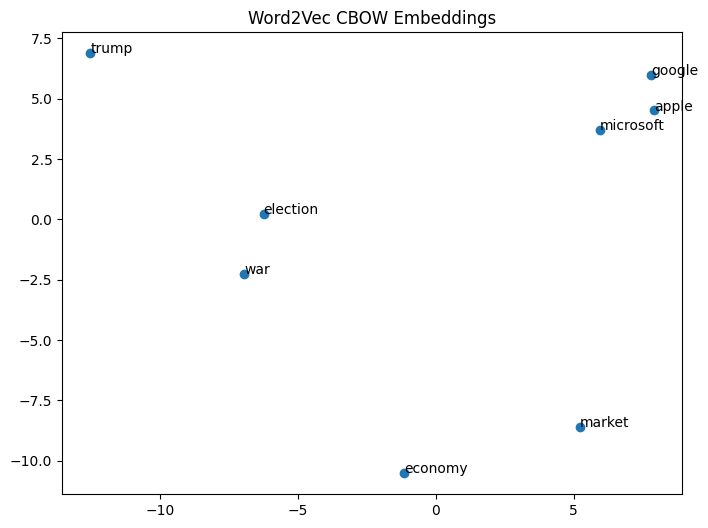

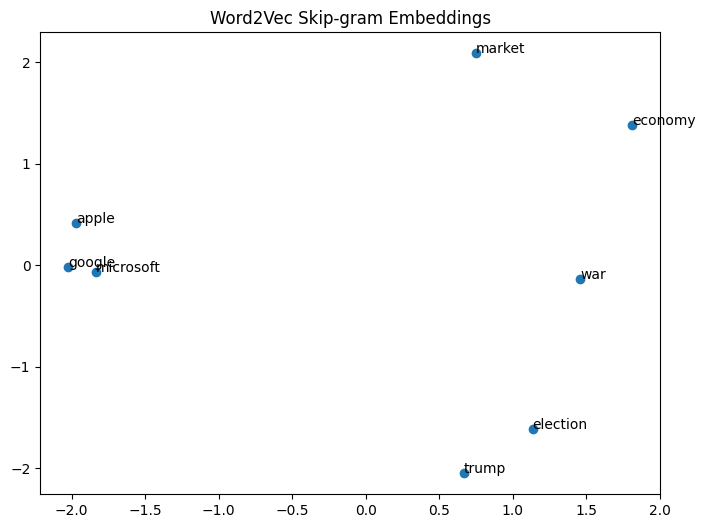

CBOW similarity (apple vs google): 0.7482146
Skip-gram similarity (apple vs google): 0.7286821


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Take your trained Word2Vec models (CBOW and Skip-gram)
w2v_cbow = cbow_model
w2v_sg = skipgram_model

def plot_word_embeddings(model, words, title):
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(8,6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title(title)
    plt.show()

# Example: pick some words to visualize
words = ["apple", "microsoft", "google", "election", "trump", "economy", "market", "war"]

plot_word_embeddings(w2v_cbow, words, "Word2Vec CBOW Embeddings")
plot_word_embeddings(w2v_sg, words, "Word2Vec Skip-gram Embeddings")

# Similarity example
print("CBOW similarity (apple vs google):", w2v_cbow.wv.similarity("apple", "google"))
print("Skip-gram similarity (apple vs google):", w2v_sg.wv.similarity("apple", "google"))


### Interpretation of Word2Vec Visualizations (CBOW vs Skip-gram)

The two plots show a 2D projection of Word2Vec embeddings trained with the **CBOW** and **Skip-gram** methods.

- **CBOW (Continuous Bag of Words)**  
  Clear thematic clusters can be observed:  
  - *Google, Apple, Microsoft* → technology companies.  
  - *Trump, election, war* → political/social domain.  
  - *Economy, market* → economic domain.  
  This indicates that CBOW effectively captures semantic similarity among frequent words, producing compact clusters.

- **Skip-gram**  
  The representation is more dispersed, but key relations are still preserved:  
  - *Google, Apple, Microsoft* remain close (tech cluster).  
  - *Economy, market* are linked to the economic context.  
  - *War, election* keep some semantic proximity.  
  Skip-gram, often better for rare words, highlights finer contextual relationships.


### **b. BERT: Extract Embeddings from Fine-Tuned Model**

In this section, we use the **fine-tuned BERT model** to generate embeddings for sentences and compute similarity:  

1. **Load the fine-tuned BERT model and tokenizer** from the saved directory.  

2. **Define a function `get_bert_embedding(text)`**:  
   - Tokenizes the input text.  
   - Passes it through BERT without gradient computation.  
   - Uses the `[CLS]` token representation as a **sentence embedding**.  

3. **Compute embeddings for example sentences**:  
   - `sent1 = "Apple releases new iPhone"`  
   - `sent2 = "Google announces new Pixel"`  

4. **Measure similarity**:  
   - Use **cosine similarity** between sentence embeddings.  
   - Example output: `BERT similarity (Apple vs Google news)` shows how semantically close these sentences are according to the fine-tuned model.

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load fine-tuned BERT
bert_path = "./bert_mlm_news_finetuned"
tokenizer = AutoTokenizer.from_pretrained(bert_path)
bert_model = AutoModel.from_pretrained(bert_path)

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    # Use [CLS] token representation as sentence embedding
    return outputs.last_hidden_state[:,0,:].numpy()

# Example words/sentences
sent1 = "Apple releases new iPhone"
sent2 = "Google announces new Pixel"

emb1 = get_bert_embedding(sent1)
emb2 = get_bert_embedding(sent2)

similarity = cosine_similarity(emb1, emb2)
print("BERT similarity (Apple vs Google news):", similarity[0][0])


Some weights of BertModel were not initialized from the model checkpoint at ./bert_mlm_news_finetuned and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT similarity (Apple vs Google news): 0.8610875


- La similarité BERT de 0.86 indique que les phrases "Apple releases new iPhone" et "Google announces new Pixel" sont sémantiquement proches.

### **c. Compare Word2Vec vs BERT on the Same Word Pairs**

In this section, we compare the **semantic similarity** between selected word pairs using **Word2Vec (CBOW & Skip-gram)** and **BERT (fine-tuned)**:  

1. **Define word pairs** to compare:  
   - Example: `("apple", "google")`, `("trump", "election")`, `("market", "economy")`.  

2. **Compute similarities**:  
   - **Word2Vec CBOW and Skip-gram**: use `.wv.similarity()` to measure cosine similarity between word embeddings.  
   - **BERT**: use `get_bert_embedding()` and `cosine_similarity()` on the `[CLS]` token embeddings.  

3. **Handle missing words**:  
   - If a word is not in the Word2Vec vocabulary, similarity is set to `None`.  

4. **Output**:  
   - Print the similarity scores for each word pair across the three models.  

**Purpose:**  
- Compare how traditional embeddings (Word2Vec) and contextual embeddings (BERT) capture semantic relationships between the same words.


In [ ]:
pairs = [("apple", "google"), ("trump", "election"), ("market", "economy")]

for w1, w2 in pairs:
    try:
        sim_cbow = w2v_cbow.wv.similarity(w1, w2)
        sim_sg = w2v_sg.wv.similarity(w1, w2)
    except KeyError:
        sim_cbow, sim_sg = None, None

    bert_sim = cosine_similarity(
        get_bert_embedding(w1),
        get_bert_embedding(w2)
    )[0][0]

    print(f"\nPair: {w1} vs {w2}")
    print(f"  Word2Vec CBOW   : {sim_cbow}")
    print(f"  Word2Vec SkipGram: {sim_sg}")
    print(f"  BERT (fine-tuned): {bert_sim}")



Pair: apple vs google
  Word2Vec CBOW   : 0.748214602470398
  Word2Vec SkipGram: 0.7286821007728577
  BERT (fine-tuned): 0.9539840221405029

Pair: trump vs election
  Word2Vec CBOW   : 0.33480513095855713
  Word2Vec SkipGram: 0.47068479657173157
  BERT (fine-tuned): 0.8900599479675293

Pair: market vs economy
  Word2Vec CBOW   : 0.5678860545158386
  Word2Vec SkipGram: 0.5635988116264343
  BERT (fine-tuned): 0.7936729192733765


### 🔹 Interpretation of Word2Vec vs BERT Similarities

- The scores show that **fine-tuned BERT captures semantics better than Word2Vec**.  
- Example: `"apple" vs "google"` → BERT 0.95 vs Word2Vec CROW ~0.74  
- Word2Vec can **underestimate relationships** for contextually related words like `"trump"` and `"election"`.  
- **Contextual models** are preferable for semantic analysis in complex texts.


## **PCA**

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Choose a set of words to compare
words = ["apple", "google", "microsoft", "trump", "biden", "election", "market", "economy", "war", "peace"]

# Word2Vec (CBOW & Skip-gram)
cbow_vectors = [w2v_cbow.wv[w] for w in words if w in w2v_cbow.wv]
sg_vectors = [w2v_sg.wv[w] for w in words if w in w2v_sg.wv]

# BERT (use CLS embedding for each word in sentence context)
bert_vectors = []
for w in words:
    emb = get_bert_embedding(w)   # function we defined earlier
    bert_vectors.append(emb.squeeze())  # remove extra batch dim


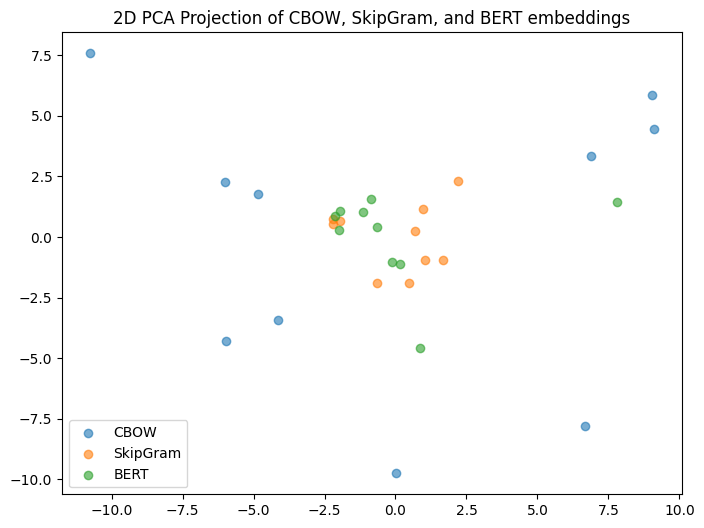

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Put embeddings in a dict for easier handling
embeddings = {
    "CBOW": cbow_vectors,
    "SkipGram": sg_vectors,
    "BERT": bert_vectors
}

# Reduce each to 2D with PCA
pca = PCA(n_components=2)
reduced = {name: pca.fit_transform(vecs) for name, vecs in embeddings.items()}

# Plot
plt.figure(figsize=(8,6))
for name, vecs in reduced.items():
    plt.scatter(vecs[:,0], vecs[:,1], label=name, alpha=0.6)
plt.legend()
plt.title("2D PCA Projection of CBOW, SkipGram, and BERT embeddings")
plt.show()


### Interpretation of 2D PCA Projection of CBOW, Skip-gram, and BERT Embeddings

The plot shows a 2D PCA projection comparing three types of embeddings: **CBOW**, **Skip-gram**, and **BERT**.

- **CBOW (blue)**  
  - The points are more widely scattered across the space.  
  - This reflects the fact that CBOW captures frequent co-occurrences but provides less precise contextual information.  
  - The embeddings are global (one vector per word), which explains the dispersion.

- **Skip-gram (orange)**  
  - The distribution is more compact compared to CBOW.  
  - Skip-gram is better at modeling rare words and capturing finer contextual relationships, leading to more organized clusters.  

- **BERT (green)**  
  - The embeddings are strongly grouped around the center.  
  - Unlike Word2Vec, BERT produces **contextual embeddings**, meaning that the same word can have different vectors depending on its sentence context.  
  - The compact structure here reflects richer semantic and contextual representations.

### Conclusion
- **CBOW** → simple and efficient for global relations, but less precise (more dispersed vectors).  
- **Skip-gram** → better for rare words, provides finer semantic organization.  
- **BERT** → contextual, compact, and semantically richer embeddings, making them more suitable for advanced NLP tasks..  
